In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [33]:
data =pd.read_csv('medical_cost_insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [7]:
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
data.duplicated().any()

True

In [35]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [38]:
data1= data.drop_duplicates()

In [5]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [6]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [7]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [8]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [24]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [26]:
X=data.drop(['charges'],axis=1 )

In [27]:
y=data['charges']

In [13]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
lr=LinearRegression()
lr.fit(X_train,y_train)
svm= SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor
rf.fit(X_train,y_train)   
gr=GradientBoostingRegressor()
gr.fit(X_train,y_train) 

TypeError: fit() missing 1 required positional argument: 'y'

In [20]:
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)

df1=pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

TypeError: predict() missing 1 required positional argument: 'X'

In [1]:
df1

NameError: name 'df1' is not defined

In [3]:
import matplotlib.pyplot as plt

NameError: name 'df1' is not defined

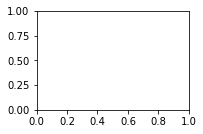

In [4]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend() 

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.legend()

In [5]:
from sklearn import metrics

In [6]:
score1=metrics.r2_Score(y_test,y_pred1)
score2=metrics.r2_Score(y_test,y_pred2)
score3=metrics.r2_Score(y_test,y_pred3)
score4=metrics.r2_Score(y_test,y_pred4)


AttributeError: module 'sklearn.metrics' has no attribute 'r2_Score'

In [7]:
print(score1,score2,score3,score4)

NameError: name 'score1' is not defined

In [ ]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)


In [ ]:
print(s1,s2,s3,s4)

In [ ]:
data={'age':40
     'sex':1
     'bmi':40.30,
      'children':4
      'smoker':1,
      'region':2
     }
df=pd.DataFrame(data,index=[0])


In [ ]:
new_pred=gr.predict(df)
print(new_pred)

In [8]:
gr=GradientBoostingRegressor()
gr.fit(X,y)

NameError: name 'GradientBoostingRegressor' is not defined

In [9]:
import joblib

In [10]:
joblib.dump(gr,'model_joblib_gr')

NameError: name 'gr' is not defined

In [11]:
model=joblib.load('model_joblib_gr)

SyntaxError: EOL while scanning string literal (<ipython-input-11-c45a4930787f>, line 1)

In [12]:
model.predict(df)

NameError: name 'model' is not defined

In [ ]:
from tkinter import*

In [ ]:
import joblib

In [14]:
derf show_entry():
     p1=float(e1.get())
     p2=float(e2.get())
     p3=float(e3.get())
     p4=float(e4.get())
     p5=float(e5.get())
     p6=float(e6.get())
 
  model =joblib.load('model_joblib_gr')
 result=model.predict([[p1,p2,p3,p4,p4,p5,p6]])
Label(master, text="Insurance Cost").grid(row=7)
Label(master,text=result).grid



master=TK()
master.title("Insurance CostPredtion")
label=Label(master,text="Insuarance Cost Prediction",bg="black",fg="white").grid(row=0,columnspan=2)

Label(master,text="Enter you Age").grid(row=1)
Label(master,text="Male or Female [1/0]").grid(row=2)
Label(master,text="Enter your BMI Value").grid(row=3)
Label(master,text="Enter Number of Children").grid(row=4)
Label(master,text="Smoker Yes/No[1/0]").grid(row=5)
Label(master,text="Region[1-4]").grid(row=6)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)

 e1.grid(row=1,column=1)
 e2.grid(row=1,column=1)
 e3.grid(row=1,column=1)
 e4.grid(row=1,column=1)
 e5.grid(row=1,column=1)
 e6.grid(row=1,column=1)
 
    Button(master,text="predict",command=show_entry).grid()

mainloop()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)